In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
#ignore all Depricated Warning
simplefilter(action='ignore', category=DeprecationWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=RuntimeWarning)
import pandas as pd
import io
import numpy as np
import os

In [3]:
train_data = pd.read_csv('C:/Users/WIN10/Desktop/Cdac_Home Credit Project/application_train.csv')
test_data = pd.read_csv('C:/Users/WIN10/Desktop/Cdac_Home Credit Project/application_test.csv')

print("Shape of training data: {}".format(train_data.shape))
print("Shape of test data: {}".format(test_data.shape))

Shape of training data: (307511, 122)
Shape of test data: (48744, 121)


In [4]:
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
dum_train = pd.get_dummies(train_data, drop_first=True)
dum_test= pd.get_dummies(test_data, drop_first=True)

In [6]:
train_labels = dum_train['TARGET']
train_sk_id_curr = dum_train['SK_ID_CURR']
test_sk_id_curr = dum_test['SK_ID_CURR']

dum_train.drop('SK_ID_CURR', inplace=True, axis=1)
dum_test.drop('SK_ID_CURR', inplace=True, axis=1)

dum_train, dum_test = dum_train.align(dum_test, join = 'inner', axis = 1)
print('Training Features shape: ', dum_train.shape)
print('Testing Features shape: ', dum_test.shape)

Training Features shape:  (307511, 225)
Testing Features shape:  (48744, 225)


In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(dum_train)
dum_train = imputer.transform(dum_train)
dum_test = imputer.transform(dum_test)

In [10]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import BaggingClassifier

In [12]:
X_train, X_test, y_train, y_test = train_test_split(dum_train, train_labels,test_size = 0.3, 
                                                    random_state=2018,
                                                    stratify=train_labels)

# Default: Tree Classifier
model_rf = BaggingClassifier(random_state=2019,oob_score=True,
                             max_features=dum_train.shape[1],
                             n_estimators=50)

In [13]:
model_rf.fit( X_train , y_train )

print("Out of Bag Score = " + "{:.4f}".format(model_rf.oob_score_))

y_pred = model_rf.predict(X_test)

Out of Bag Score = 0.9177


In [14]:
y_pred = model_rf.predict(X_test)

In [15]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[84690   116]
 [ 7348   100]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.46      0.01      0.03      7448

   micro avg       0.92      0.92      0.92     92254
   macro avg       0.69      0.51      0.49     92254
weighted avg       0.88      0.92      0.88     92254

0.919092939059553


In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model_rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

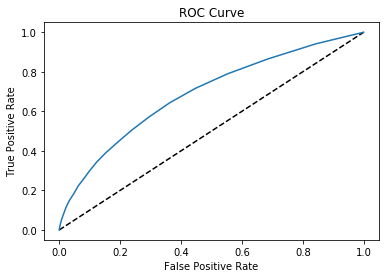

In [18]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [19]:
roc_auc_score(y_test, y_pred_prob)

0.6878151083652274

In [20]:
predictions = model_rf.predict(dum_test)

In [21]:
submission = pd.DataFrame({'SK_ID_CURR': test_sk_id_curr, 'TARGET': predictions})

In [22]:
submission.to_csv("C:/Users/WIN10/Desktop/Cdac_Home Credit Project/submit_bagging_imp.csv", index = False)